In [ ]:
%matplotlib inline

# Sample plots 

Here you can find example plots with the code that generated them. Make changes to the scripts to understand them better. Work on the last two plot scripts (Animated line plot and 3D animated random walk) at home in case you don't have time in the tutorial class. For more advanced plotting techniques (and as a reference work for future plotting attempts), check the following link: https://matplotlib.org/gallery 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.01, 10.0, 0.01)
s = middlepositionlist
plt.plot(t, s)

plt.xlim(0, 10) 
#plt.xlim(5, 0)   # decreasing time

plt.xlabel('time(s)')
plt.ylabel('middle point(m)')
plt.title('position of the middle point vs time for κ=0.1')
#plt.grid(True)
plt.grid(False)

plt.show()

NameError: name 'middlepositionlist' is not defined

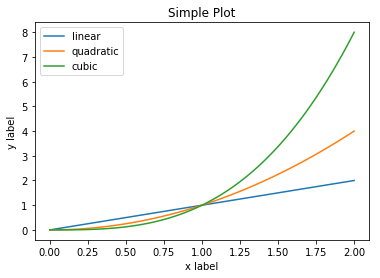

In [3]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

# Scatter plots with a legend
Change the value of alpha between zero and one to see how the output changes.

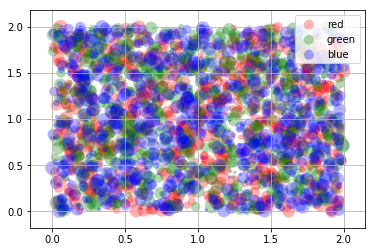

In [16]:
import matplotlib.pyplot as plt
from numpy.random import rand


fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = rand(2, n)*2
    scale = 200 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')
    



ax.legend()
ax.grid(True)

plt.show()

# Multiple subplots
Simple demo with multiple subplots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

SyntaxError: invalid syntax (<ipython-input-1-c6b4c0aff087>, line 11)

Many plot types can be combined in one figure to create powerful and flexible representations of data.

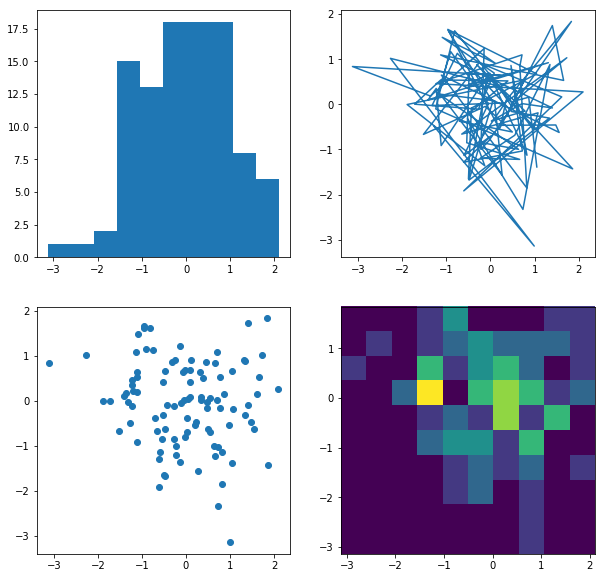

In [18]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

# Plotting using functions or for loops

Typically one finds oneself making the same plots over and over again, but with different data sets, which leads to needing to write specialized functions to do the plotting. The recommended function signature is something like:

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

It is also possible to use for loops to plot multiple curves:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.subplot(111)
t1 = np.arange(0.0, 1.0, 0.01)

for n in [1, 2, 3, 4]:
    plt.plot(t1, t1**n, label="n=%d"%(n,))

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()


# Different ways of specifying error bars


Errors can be specified as a constant value (as shown in
`errorbar_demo.py`). However, this example demonstrates
how they vary by specifying arrays of error values.

If the raw ``x`` and ``y`` data have length N, there are two options:

Array of shape (N,):
    Error varies for each point, but the error values are
    symmetric (i.e. the lower and upper values are equal).

Array of shape (2, N):
    Error varies for each point, and the lower and upper limits
    (in that order) are different (asymmetric case)

In addition, this example demonstrates how to use log
scale with error bars.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

# 3D surface (color map)
Demonstrates plotting a 3D surface colored with the coolwarm color map. The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the z axis tick labels.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Animated line plot

In [ ]:
%matplotlib notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

# Animated 3D random walk



In [ ]:
%matplotlib notebook

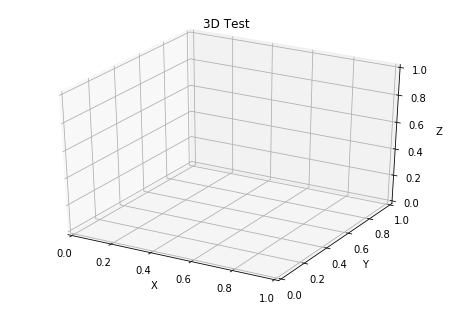

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
len(np.zeros((101)))

101